In [1]:
#Cleaned up code
#Updated March 18, 2021

#The following notebook is a series of simple examples of applying the method to data on a 
#CODEX/Keyence microscrope to produce virtual H&E images using fluorescence data.  If you 
#find it useful, will you please consider citing the relevant article?:

#Creating virtual H&E images using samples imaged on a commercial CODEX platform
#Paul D. Simonson, Xiaobing Ren,  Jonathan R. Fromm
#doi: https://doi.org/10.1101/2021.02.05.21249150
#Submitted to Journal of Pathology Informatics, December 2020

#import tifffile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#This line is use for working within Jupyter notebooks:
%matplotlib inline

#Defaults:
k1 = k2 = 0.001

background_red = 0.25
background_green = 0.25
background_blue = 0.25
background = [background_red, background_green, background_blue]

beta_DAPI_red = 9.147
beta_DAPI_green = 6.9215
beta_DAPI_blue = 1.0
beta_DAPI = [beta_DAPI_red, beta_DAPI_green, beta_DAPI_blue]

beta_eosin_red = 0.1
beta_eosin_green = 15.8
beta_eosin_blue = 0.3
beta_eosin = [beta_eosin_red, beta_eosin_green, beta_eosin_blue]

def createVirtualHE(dapi_image, eosin_image, 
                    k1, k2, 
                    background=background, beta_DAPI=beta_DAPI, beta_eosin=beta_eosin):
    new_image = np.empty([dapi_image.shape[0], dapi_image.shape[1], 3])
    new_image[:,:,0] = background[0] + (1 - background[0]) * np.exp(- k1 * beta_DAPI[0] * dapi_image - k2 * beta_eosin[0] * eosin_image)
    new_image[:,:,1] = background[1] + (1 - background[1]) * np.exp(- k1 * beta_DAPI[1] * dapi_image - k2 * beta_eosin[1] * eosin_image)
    new_image[:,:,2] = background[2] + (1 - background[2]) * np.exp(- k1 * beta_DAPI[2] * dapi_image - k2 * beta_eosin[2] * eosin_image)
    return new_image

(3066, 4087)
(3066, 4087)


Text(0.5, 1.0, 'Virtual H&E')

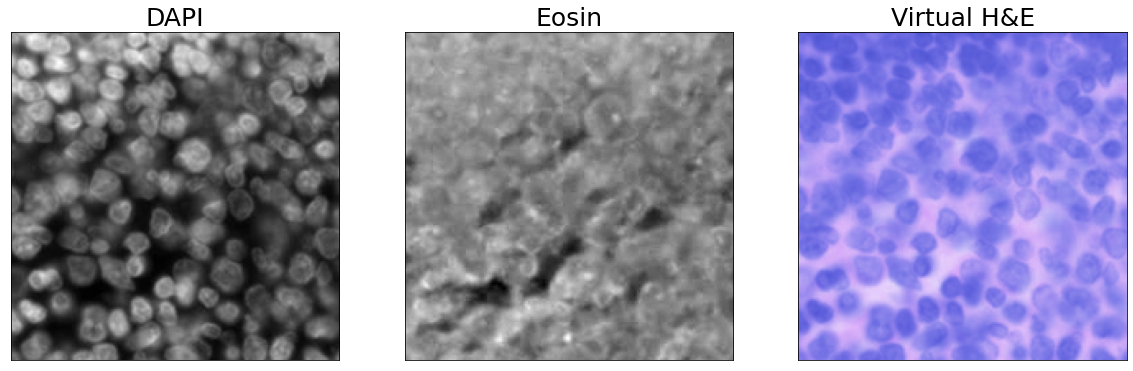

In [2]:
#Example 1: Using 16 bit images
#Revisiting experiment 62

#Adjusted constants:
k1 = 0.000005
k2 = 0.0000013

dapi_image = mpimg.imread('./data/experiment62/DAPI stitched 40x 16 bit 1_200s.tif')
eosin_image = mpimg.imread('./data/experiment62/eosin 40x 1_200s 16 bit.tif')
print(dapi_image.shape)
print(eosin_image.shape)

new_image = createVirtualHE(dapi_image, eosin_image, k1=k1, k2=k2)

#Position and size (delta) for zoomed in image
x = 2300
y = 2600
delta = 200

plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(1,3, 1)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(dapi_image[y:y+delta, x:x+delta], cmap='gray')
plt.title('DAPI', fontsize=25)

plt.subplot(1,3, 2)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(eosin_image[y:y+delta, x:x+delta], cmap='gray')
plt.title('Eosin', fontsize=25)

plt.subplot(1,3, 3)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(new_image[y:y+delta, x:x+delta])
plt.title('Virtual H&E', fontsize=25)

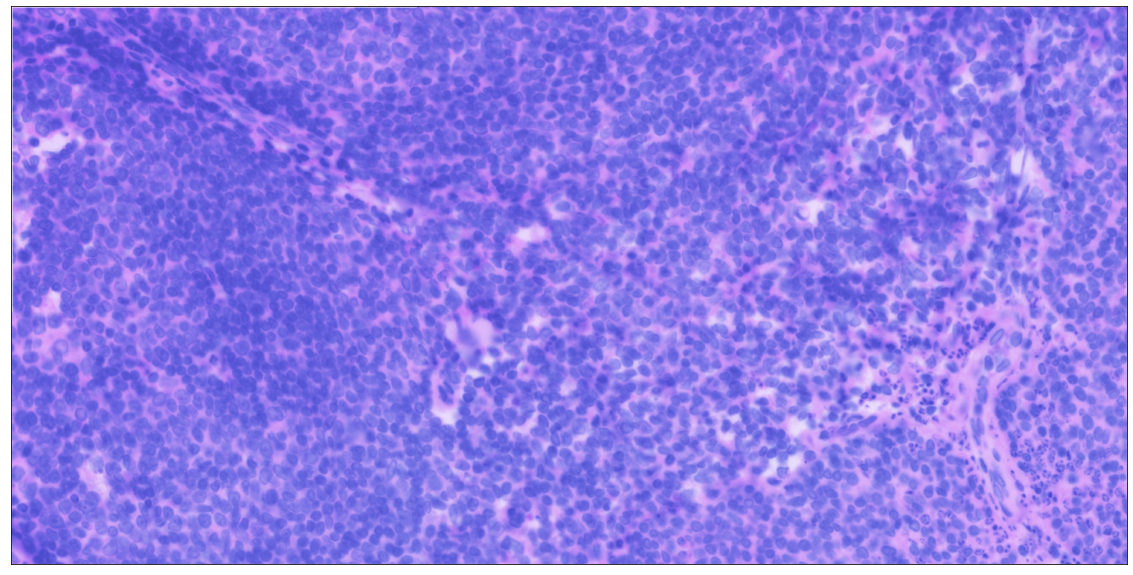

In [3]:
plt.subplot(1,1,1)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(new_image[0:0+750, 0:0+1500])

#mpimg.imsave("output/Fig 1d.png", new_image[0:0+750, 0:0+1500])

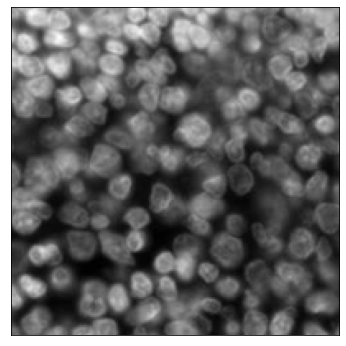

In [4]:
#Fig 1a
plt.subplot(1,3, 1)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(dapi_image[y:y+delta, x:x+delta], cmap='gray')
#plt.title('DAPI', fontsize=25)

#mpimg.imsave("output/Fig 1a.png", dapi_image[y:y+delta, x:x+delta], cmap='gray')

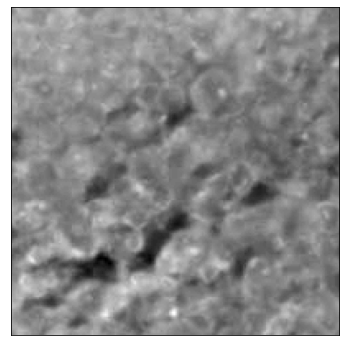

In [5]:
#Fig 1B
plt.subplot(1,3, 2)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(eosin_image[y:y+delta, x:x+delta], cmap='gray')
#plt.title('Eosin', fontsize=25)
#pimg.imsave("output/Fig 1b.png", eosin_image[y:y+delta, x:x+delta], cmap='gray')

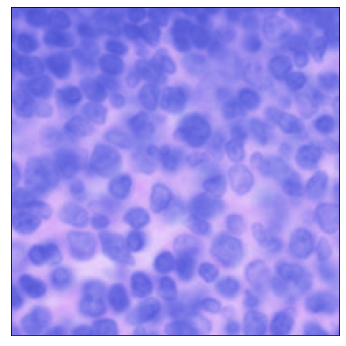

In [6]:
#Fig 1C
plt.subplot(1,3, 3)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(new_image[y:y+delta, x:x+delta])
#plt.title('Virtual H&E', fontsize=25)
#mpimg.imsave("output/Fig 1c.png", new_image[y:y+delta, x:x+delta])

Text(0.5, 1.0, 'Virtual H&E')

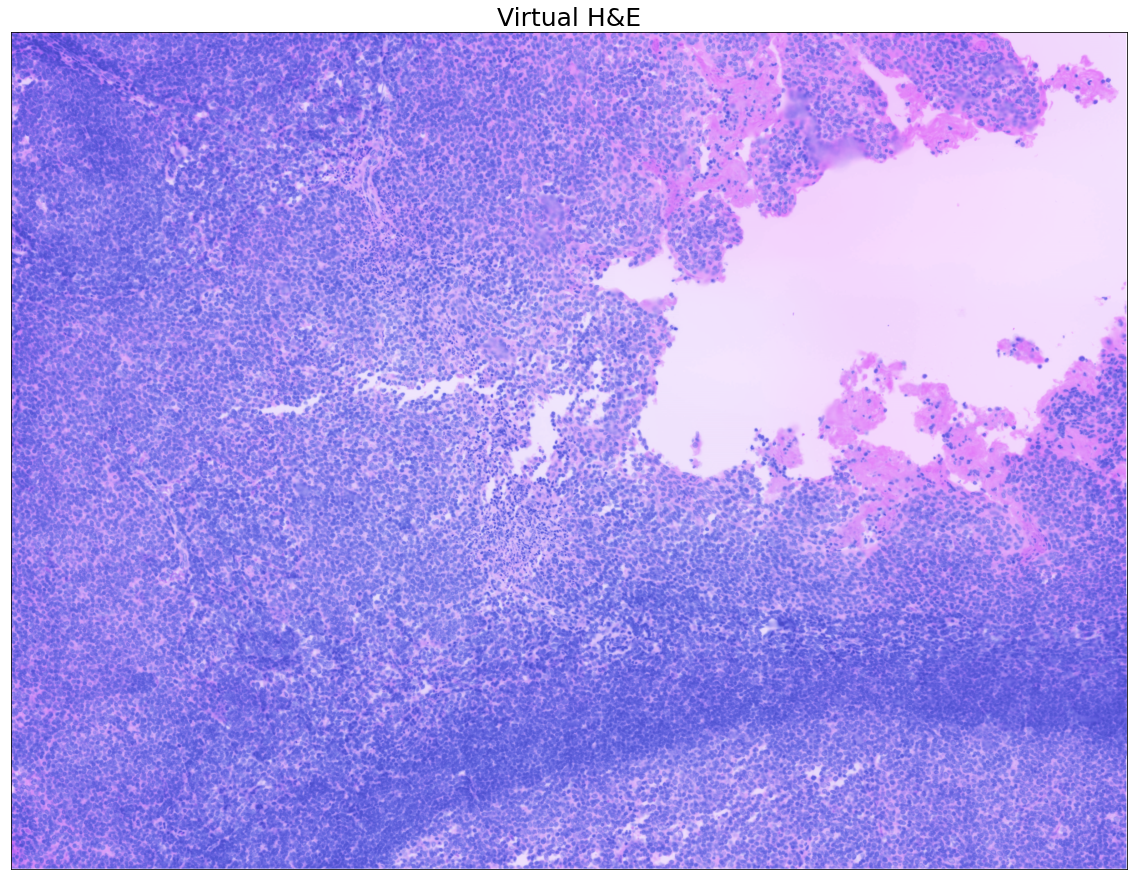

In [7]:
plt.subplot(1,1,1)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(new_image)
plt.title('Virtual H&E', fontsize=25)

(1820, 2429)
(1820, 2429)


Text(0.5, 1.0, 'Virtual H&E')

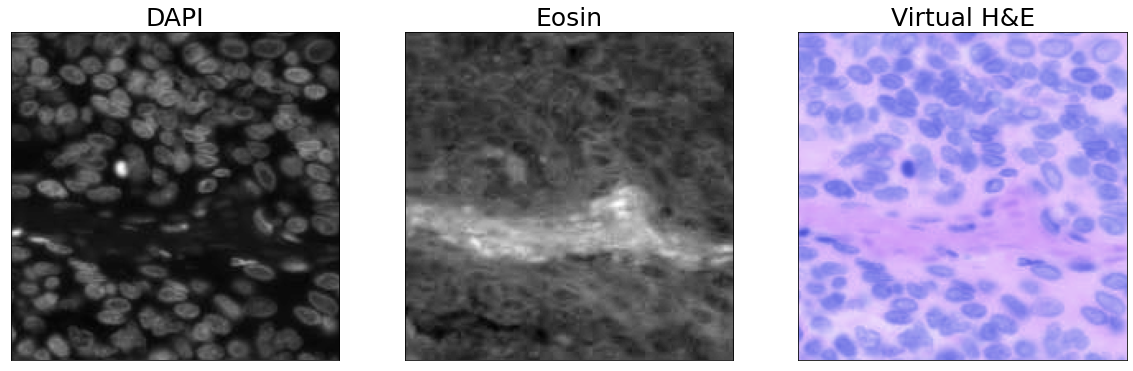

In [8]:
#Example 2

#Revisiting experiment 63

#Look at different files/area
k1 = 0.000007
k2 = 0.0000018

dapi_image = mpimg.imread('./data/experiment63/Untitled3_CH1.tif')
eosin_image = mpimg.imread('./data/experiment63/Untitled3_CH2.tif')
print(dapi_image.shape)
print(eosin_image.shape)

new_image = createVirtualHE(dapi_image, eosin_image, k1= k1, k2 = k2)

#Zoom
x = 1150
y = 1125
delta = 200

plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(1,3, 1)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(dapi_image[y:y+delta, x:x+delta], cmap='gray')
plt.title('DAPI', fontsize=25)

plt.subplot(1,3, 2)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(eosin_image[y:y+delta, x:x+delta], cmap='gray')
plt.title('Eosin', fontsize=25)

plt.subplot(1,3, 3)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(new_image[y:y+delta, x:x+delta])
plt.title('Virtual H&E', fontsize=25)

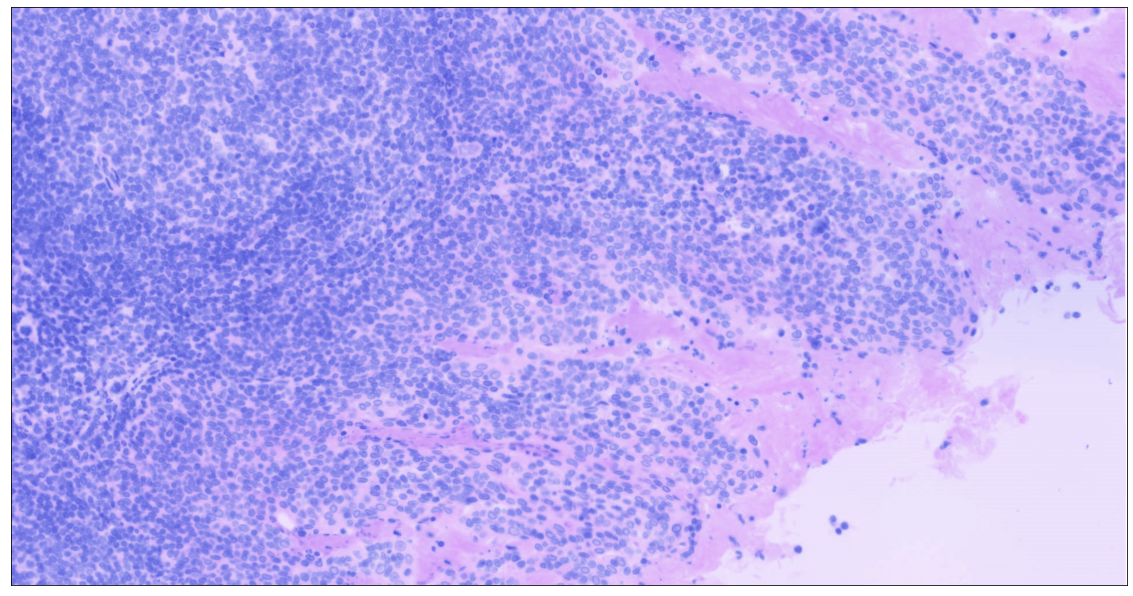

In [9]:
plt.subplot(1,1,1)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(new_image[500:500+1000, 500:500+2000])
#plt.imshow(new_image)

#plt.title('Virtual H&E', fontsize=25)
#mpimg.imsave("output/Fig 2d.png", new_image)

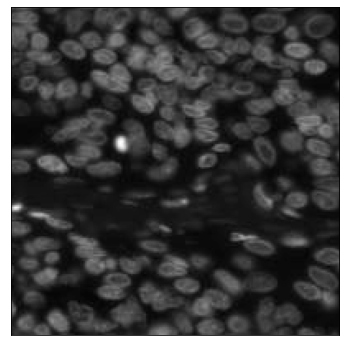

In [10]:
#Fig 2A
plt.subplot(1,3, 1)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(dapi_image[y:y+delta, x:x+delta], cmap='gray')
#plt.title('DAPI', fontsize=25)
#mpimg.imsave("output/Fig 2a.png", new_image)

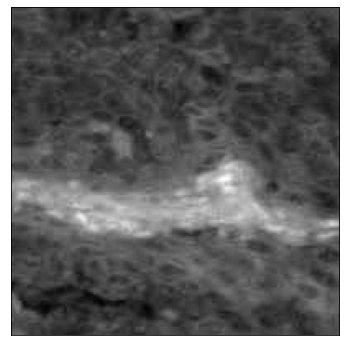

In [11]:
#Fig 2B
plt.subplot(1,3, 2)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(eosin_image[y:y+delta, x:x+delta], cmap='gray')
#plt.title('Eosin', fontsize=25)
#mpimg.imsave("output/Fig 2b.png", new_image)

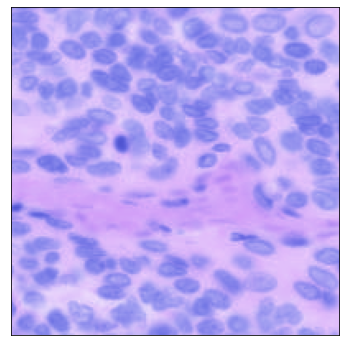

In [12]:
#Fig 2C
plt.subplot(1,3, 3)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(new_image[y:y+delta, x:x+delta])
#plt.title('Virtual H&E', fontsize=25)
#mpimg.imsave("output/Fig 2c.png", new_image)